In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data from CSV
sp_data = pd.read_csv('SP500_5y.csv', parse_dates=['Date'])

# Ensure 'date' column is in datetime format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], utc=True)

# Sorting by date 
sp_data.sort_values(by='Date', inplace=True)

# Handling missing values if any
sp_data.dropna(inplace=True)


In [162]:
sp_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [163]:
# Display DataFrame for context
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0


In [164]:
# Extract features and target variable
X = sp_data.index
y = sp_data['Close']

In [165]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
# Instantiate the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [168]:
# Make predictions on the testing set
y_pred = model.predict(X_test.values.reshape(-1, 1))

In [192]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round both MSE and R2 to 5 decimal places
mse_rounded = round(mse, 5)
r2_rounded = round(r2, 5)

print("Mean Squared Error (MSE):", mse_rounded)
print("R-squared (R2):", r2_rounded)

Mean Squared Error (MSE): 121267.66151
R-squared (R2): 0.69644


In [194]:
import math

# Calculate RMSE
rmse = math.sqrt(mse)

# Round RMSE to 5 decimals
rmse_rounded = round(rmse, 5)

print("Root Mean Squared Error (RMSE):", rmse_rounded)

Root Mean Squared Error (RMSE): 348.23507


In [171]:
# Load spot price of Gold data from CSV
gold_data = pd.read_csv('gold_spot_5y.csv')


In [174]:
# Ensure 'Date' column is in datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)

# If not sorted, sort it first
gold_data.sort_values(by='Date', inplace=True)

In [176]:
sp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0


In [177]:
gold_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [178]:
# Convert 'Date' column to datetime with UTC timezone
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)


In [179]:
# Merge sp_data with gold_data using the default index columns
merged_data = pd.merge(sp_data, gold_data, left_index=True, right_index=True, how='inner')


In [180]:
merged_data.head()

,Date_x,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Date_y,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
0,2019-02-06 05:00:00+00:00,2735.050049,2738.080078,2724.149902,2731.610107,3486590000,0.0,0.0,2019-02-05 05:00:00+00:00,1311.099976,1315.099976,1311.000000,1314.199951,362,0.0,0.0
1,2019-02-07 05:00:00+00:00,2717.530029,2719.320068,2687.260010,2706.050049,4114040000,0.0,0.0,2019-02-06 05:00:00+00:00,1312.500000,1313.500000,1305.000000,1309.500000,358,0.0,0.0
2,2019-02-08 05:00:00+00:00,2692.360107,2708.070068,2681.830078,2707.879883,3649510000,0.0,0.0,2019-02-07 05:00:00+00:00,1302.900024,1310.400024,1302.199951,1309.400024,203,0.0,0.0
3,2019-02-11 05:00:00+00:00,2712.399902,2718.050049,2703.790039,2709.800049,3395330000,0.0,0.0,2019-02-08 05:00:00+00:00,1309.500000,1314.000000,1307.800049,1313.699951,122,0.0,0.0
4,2019-02-12 05:00:00+00:00,2722.610107,2748.189941,2722.610107,2744.729980,3843020000,0.0,0.0,2019-02-11 05:00:00+00:00,1313.400024,1313.400024,1304.699951,1307.000000,119,0.0,0.0


In [181]:
merged_data.columns

Index(['Date_x', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Volume_x',
       'Dividends_x', 'Stock Splits_x', 'Date_y', 'Open_y', 'High_y', 'Low_y',
       'Close_y', 'Volume_y', 'Dividends_y', 'Stock Splits_y'],
      dtype='object')

In [184]:
# Install the required libraries
!pip install prophet

01:01:21 - cmdstanpy - INFO - Chain [1] start processing
01:01:21 - cmdstanpy - INFO - Chain [1] done processing


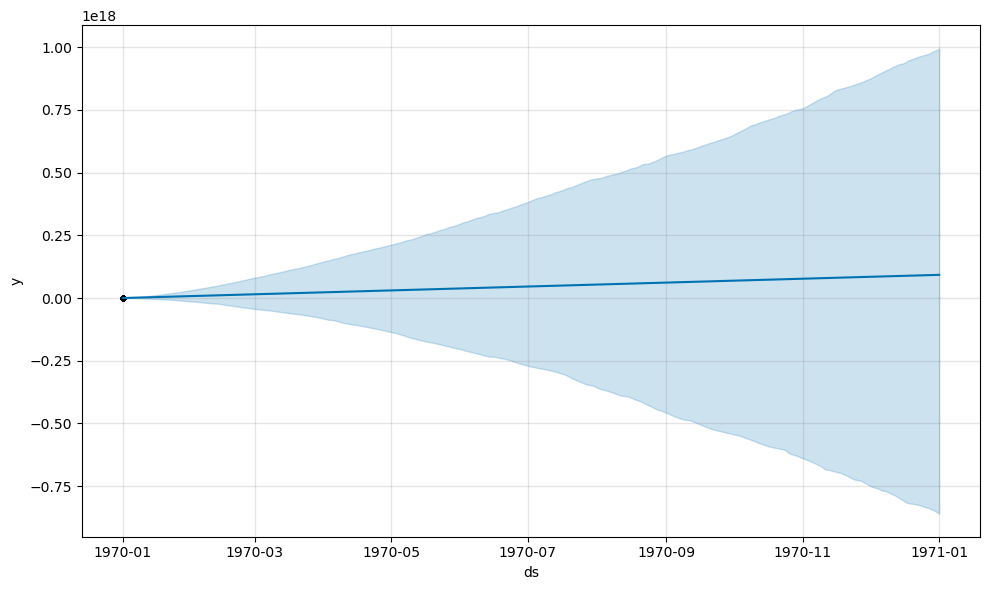

In [190]:
# Prepare DataFrame for Prophet
merged_data_prophet = merged_data[['Date_x', 'Close_x', 'Close_y']].copy()
merged_data_prophet.columns = ['ds', 'sp500', 'gold']  # Renaming columns as per Prophet's requirement

# Use the index as the 'ds' column
merged_data_prophet['ds'] = merged_data_prophet.index

# Ensure 'ds' column is in datetime format
merged_data_prophet['ds'] = pd.to_datetime(merged_data_prophet['ds'])

# Create a new DataFrame for Prophet with 'ds' and 'y' columns
prophet_data = merged_data_prophet[['ds', 'sp500']].copy()
prophet_data.columns = ['ds', 'y']  # Rename 'Close_x' column to 'y'

# Create and fit Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Making predictions for the next 365 days
forecast = model.predict(future)

# Plotting the forecast
fig = model.plot(forecast)


01:02:26 - cmdstanpy - INFO - Chain [1] start processing
01:02:26 - cmdstanpy - INFO - Chain [1] done processing


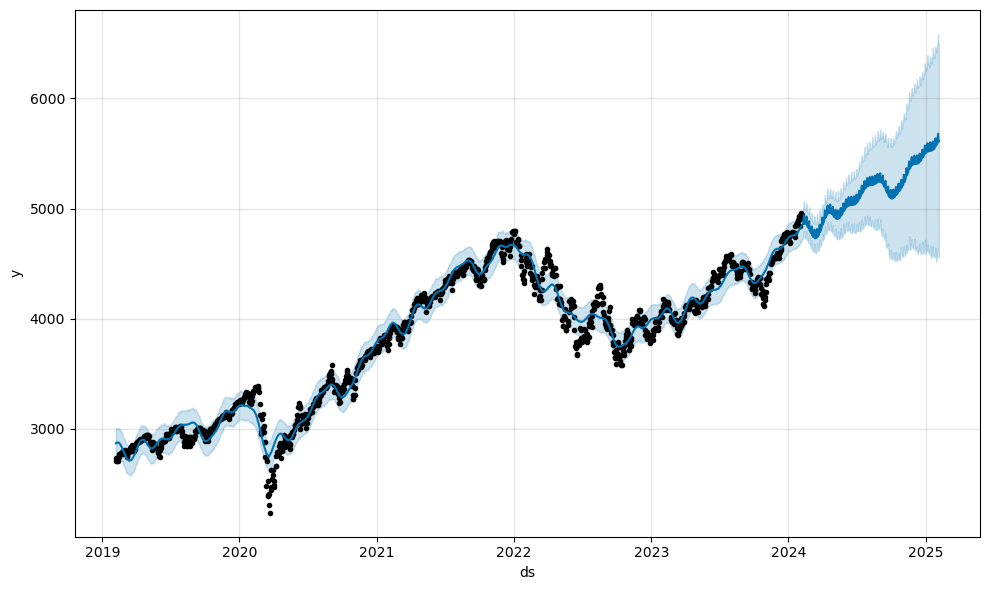

In [191]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# Remove timezone information from 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Instantiate Prophet model
model = Prophet()

# Fit the model to the data
model.fit(prophet_data)

# Make future predictions
future_dates = model.make_future_dataframe(periods=365)
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
